In [1]:
#   Author: Rahul ArvindKumar Thakur
#   Email: rahulkumarr2080@gmail.com
#   Date: 31st July 2021

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
plt.rcParams["figure.figsize"] = (20,7)

#### Task 1 - Import a 311 NYC service request.

In [3]:
# 1)Import a 311 NYC service request. 
customer_service_request=pd.read_csv('DataSets/311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

#Giving low Memory Warning so put low_memory=False above

In [4]:
#Check CSV Imported or not, This code will help to view top 5 Rows
customer_service_request.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# Check Number of Rows(observations) & Number of Columns(Variables)
customer_service_request.shape

(300698, 53)

In [6]:
#This means this Dataset has 300698 Rows(observations) and 53 Columns(Variables)

In [7]:
###############################################################################################################
#            Data Preprocessing  - Cleaning up the data and make it ready for building Models                 #
###############################################################################################################

In [8]:
# Check the duplicate columns or Variables with duplicate name
customer_service_request.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
# list of empty columns name given in data description they are of no use so we have to delete these
empty_data_cols = ['Landmark','School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough',
'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name']

unspecified_data_cols =['Park Facility Name','School Name','School Number','School Region','School Code',
'School Phone Number','School Address','School City','School State','School Zip']

# Deleteing both Empty Columns and Unspecified columns from data frame
customer_service_request= customer_service_request.drop(empty_data_cols, axis=1)
customer_service_request= customer_service_request.drop(unspecified_data_cols, axis=1)
customer_service_request.shape

(300698, 30)

In [10]:
# Deleting duplicate representation in multiple columns
# Location with lat long info already avaiable in Lattitude and Longtitude. Deleting location from data frame
customer_service_request= customer_service_request.drop(['Latitude','Longitude'], axis=1)
customer_service_request.shape

(300698, 28)

In [11]:
#Removing ID Column 'Unique Key' which doesnt have any significance in analytics model
customer_service_request = customer_service_request.drop(['Unique Key'],axis=1)

In [12]:
# Now we have to identify columns which has null or empty or single value and these columns will not have
# any significance while processing model
single_value_columns = []
for i in customer_service_request.columns:
    if len(customer_service_request[i].value_counts()) ==1:
        single_value_columns.append(i)
        print('Following columns has single value ', single_value_columns)
#Deleting single value columns from dataframe
customer_service_request= customer_service_request.drop(single_value_columns, axis=1)


Following columns has single value  ['Agency']
Following columns has single value  ['Agency', 'Facility Type']


In [13]:
# Removing columns which has more than 70% data is null or empty and doesnt have any impact of analytics.
customer_service_request.isnull().sum().sort_values(ascending=False)

Intersection Street 2             257336
Intersection Street 1             256840
Cross Street 2                     49779
Cross Street 1                     49279
Incident Address                   44410
Street Name                        44410
Descriptor                          5914
Y Coordinate (State Plane)          3540
X Coordinate (State Plane)          3540
Location                            3540
Address Type                        2815
Incident Zip                        2615
City                                2614
Resolution Action Updated Date      2187
Closed Date                         2164
Location Type                        131
Due Date                               3
Status                                 0
Resolution Description                 0
Community Board                        0
Borough                                0
Complaint Type                         0
Agency Name                            0
Park Borough                           0
Created Date    

In [14]:
# Above cell listed Intersection Street 2 and Intersection Street 1 has more than 70% data null and these columns
# doesnt have much impact on analytics model building.hence dropping these columns
customer_service_request =customer_service_request.drop(['Intersection Street 1','Intersection Street 2'],axis=1)
customer_service_request.shape

(300698, 23)

In [15]:
# Seperating object columns and non object columns from dataframe not required.
# non object columns are Incident Zip, X Coordinate (State Plane), Y Coordinate (State Plane) even though
# these columns represented in number format but these are more categorized data than numerical
# hence converting these columns as object columns
customer_service_request=customer_service_request.astype(
    {'Incident Zip':'str','X Coordinate (State Plane)':'str','Y Coordinate (State Plane)':'str'})


In [16]:
#Converting string data to upper case to make model case insentive
for col in customer_service_request.columns:
    customer_service_request[col] = customer_service_request[col].str.upper()
    
customer_service_request.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Location
0,12/31/2015 11:59:45 PM,01-01-16 0:55,NEW YORK CITY POLICE DEPARTMENT,NOISE - STREET/SIDEWALK,LOUD MUSIC/PARTY,STREET/SIDEWALK,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,CLOSED,01-01-16 7:59,THE POLICE DEPARTMENT RESPONDED AND UPON ARRIV...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01-01-16 1:26,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,CLOSED,01-01-16 7:59,THE POLICE DEPARTMENT RESPONDED TO THE COMPLAI...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01-01-16 4:51,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,CLOSED,01-01-16 7:59,THE POLICE DEPARTMENT RESPONDED AND UPON ARRIV...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01-01-16 7:43,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,COMMERCIAL OVERNIGHT PARKING,STREET/SIDEWALK,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,CLOSED,01-01-16 7:57,THE POLICE DEPARTMENT RESPONDED TO THE COMPLAI...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01-01-16 3:24,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,BLOCKED SIDEWALK,STREET/SIDEWALK,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,CLOSED,01-01-16 7:56,THE POLICE DEPARTMENT RESPONDED AND UPON ARRIV...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,"(40.733059618956815, -73.87416975810375)"


In [17]:
#Due Date and Resolution Action Updated Date cannot be less than Created Date. Filling Null column value with Created Date
customer_service_request['Due Date']=customer_service_request['Due Date'].fillna(customer_service_request['Created Date'])
customer_service_request['Resolution Action Updated Date']=customer_service_request[
    'Resolution Action Updated Date'].fillna(customer_service_request['Created Date'])

In [18]:
#Filling empty/null columns of object columns with max occurance item value
for col in customer_service_request:
    customer_service_request[col]=customer_service_request[col].fillna(
        customer_service_request[col].value_counts().idxmax())
#Checking is there any null cells present in Dataframe
customer_service_request.isnull().sum().sort_values()

Created Date                      0
Y Coordinate (State Plane)        0
X Coordinate (State Plane)        0
Borough                           0
Community Board                   0
Resolution Action Updated Date    0
Resolution Description            0
Due Date                          0
Status                            0
City                              0
Park Borough                      0
Address Type                      0
Cross Street 1                    0
Street Name                       0
Incident Address                  0
Incident Zip                      0
Location Type                     0
Descriptor                        0
Complaint Type                    0
Agency Name                       0
Closed Date                       0
Cross Street 2                    0
Location                          0
dtype: int64

In [19]:
customer_service_request.Status.value_counts()

CLOSED      298471
OPEN          1439
ASSIGNED       786
DRAFT            2
Name: Status, dtype: int64

In [20]:
# Converting all the date columns datatype from str object column to datetime object column
date_cols =['Created Date', 'Closed Date','Due Date','Resolution Action Updated Date']
for col in date_cols:
    customer_service_request[col] = pd.to_datetime(customer_service_request[col])

In [21]:
customer_service_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    300698 non-null  datetime64[ns]
 1   Closed Date                     300698 non-null  datetime64[ns]
 2   Agency Name                     300698 non-null  object        
 3   Complaint Type                  300698 non-null  object        
 4   Descriptor                      300698 non-null  object        
 5   Location Type                   300698 non-null  object        
 6   Incident Zip                    300698 non-null  object        
 7   Incident Address                300698 non-null  object        
 8   Street Name                     300698 non-null  object        
 9   Cross Street 1                  300698 non-null  object        
 10  Cross Street 2                  300698 non-null  object 

In [22]:
closed_status_requests = customer_service_request[customer_service_request['Status']=='CLOSED']
non_closed_status_requests = customer_service_request[customer_service_request['Status']!='CLOSED']
open_status_requests = customer_service_request[customer_service_request['Status']=='OPEN']
assigned_status_requests = customer_service_request[customer_service_request['Status']=='ASSIGNED']
draft_status_requests = customer_service_request[customer_service_request['Status']=='DRAFT']
print('Closed requests',closed_status_requests.shape)
print('Not closed requests (OPEN+ASSIGNED+DRAFT)', non_closed_status_requests.shape)
print('Open requests',open_status_requests.shape)
print('Assigned requests',assigned_status_requests.shape)
print('Drafted requests',draft_status_requests.shape)

Closed requests (298471, 23)
Not closed requests (OPEN+ASSIGNED+DRAFT) (2227, 23)
Open requests (1439, 23)
Assigned requests (786, 23)
Drafted requests (2, 23)


In [23]:
#Function to range classify observations based on Request_Closing_Time for CLOSED status requests
def segregate_duration_range(duration):
    if duration <=60:
        return "00-1 Hrs"
    elif duration >60 and duration<= 120:
        return "1-2 Hrs"
    elif duration >120 and duration<= 240:
        return "2-4 Hrs"
    elif duration >240 and duration<= 480:
        return "4-8 Hrs"
    elif duration >480 and duration< 960:
        return "8-16 Hrs"
    elif duration >960 and duration< 1440:
        return "16- 24 Hrs"
    elif duration >1440 and duration< 2880:
        return "1-2 Days"
    elif duration >2880 and duration< 5760:
        return "2-4 Days"
    elif duration >5760 and duration< 11520:
        return "4-8 Days"
    elif duration >11520 :
        return "More than 8 Days"

##### Task 2 - Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [24]:
closed_status_requests.shape

(298471, 23)

In [25]:
print('Both Created Date and Closed Date is available for closed CSRs')
closed_status_requests['Request_Closing_Time']=0
closed_status_requests['Resolved_Duration_Grp']=''
closed_status_requests['Closed-MM-YYYY']=''
 # request_closing_time_index = closed_status_requests.columns.get_loc('Request_Closing_Time')
for index, csr in closed_status_requests.iterrows():
    Request_Closing_Time = int(((csr['Closed Date']-csr['Created Date']).total_seconds())/60)
    closed_status_requests.at[index,'Request_Closing_Time'] = Request_Closing_Time
    closed_status_requests.at[index,'Resolved_Duration_Grp'] = segregate_duration_range(Request_Closing_Time)
closed_status_requests.head()

Both Created Date and Closed Date is available for closed CSRs


<ipython-input-25-308fd748276a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_status_requests['Request_Closing_Time']=0
<ipython-input-25-308fd748276a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_status_requests['Resolved_Duration_Grp']=''
<ipython-input-25-308fd748276a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Location,Request_Closing_Time,Resolved_Duration_Grp,Closed-MM-YYYY
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NEW YORK CITY POLICE DEPARTMENT,NOISE - STREET/SIDEWALK,LOUD MUSIC/PARTY,STREET/SIDEWALK,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,"(40.86568153633767, -73.92350095571744)",55,00-1 Hrs,
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,"(40.775945312321085, -73.91509393898605)",86,1-2 Hrs,
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,2016-01-01 04:51:00,07 BRONX,BRONX,1015081.0,256380.0,BRONX,"(40.870324522111424, -73.88852464418646)",291,4-8 Hrs,
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,COMMERCIAL OVERNIGHT PARKING,STREET/SIDEWALK,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,2016-01-01 07:43:00,10 BRONX,BRONX,1031740.0,243899.0,BRONX,"(40.83599404683083, -73.82837939584206)",465,4-8 Hrs,
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,BLOCKED SIDEWALK,STREET/SIDEWALK,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,2016-01-01 03:24:00,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,"(40.733059618956815, -73.87416975810375)",207,2-4 Hrs,


#### Task 3 - Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

<AxesSubplot:title={'center':'Most common Complaints'}>

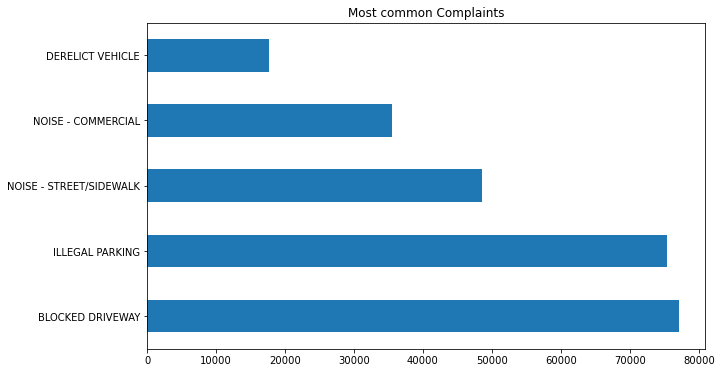

In [26]:
# Conclusion -1 Most frequent Complaints - Top 5
# Used .head() to show top 5 major Complaint Type
(customer_service_request['Complaint Type'].value_counts()).head().plot(kind='barh',
                    figsize=(10,6), title = 'Most common Complaints')

###### *1)This graph shows that Blocked Driveway and Illegal Parking are the common complaints*

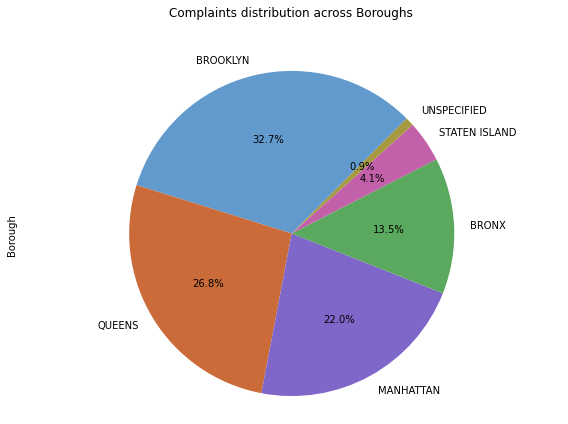

In [27]:
# Conclusion -2 complaints distribution across Boroughs
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
customer_service_request['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        startangle=45, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('Complaints distribution across Boroughs\n\n')
plt.tight_layout()
plt.show()

#### *2)This Conclusion indicates that Brooklyn has more complaints with (32.7%) and after that Queens (26.8%)*

In [28]:
#Conclusion - 3 Analysis for Brooklyn borough which has highest number of complains

df_Brooklyn = customer_service_request[customer_service_request['Borough']=='BROOKLYN']

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

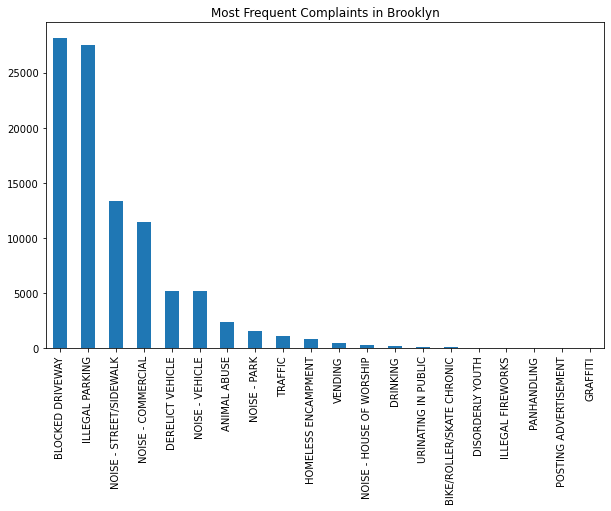

In [29]:
(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

#### *3) Blocked Driveway and Illegal Parking is the Most Frequent Complaints in Brooklyn*

<AxesSubplot:title={'center':'Location Type vs # Complaints'}>

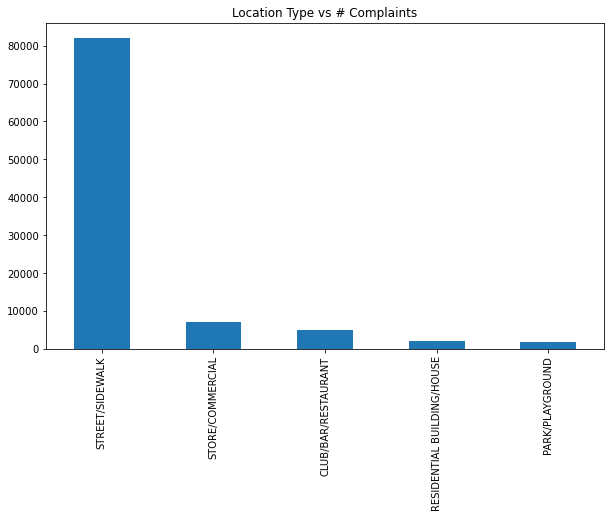

In [30]:
#Conclusion - 4 location type vs complaints
(df_Brooklyn['Location Type'].value_counts()).head().plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

#### *4) Street/Sidewalk has more complaints*

<AxesSubplot:>

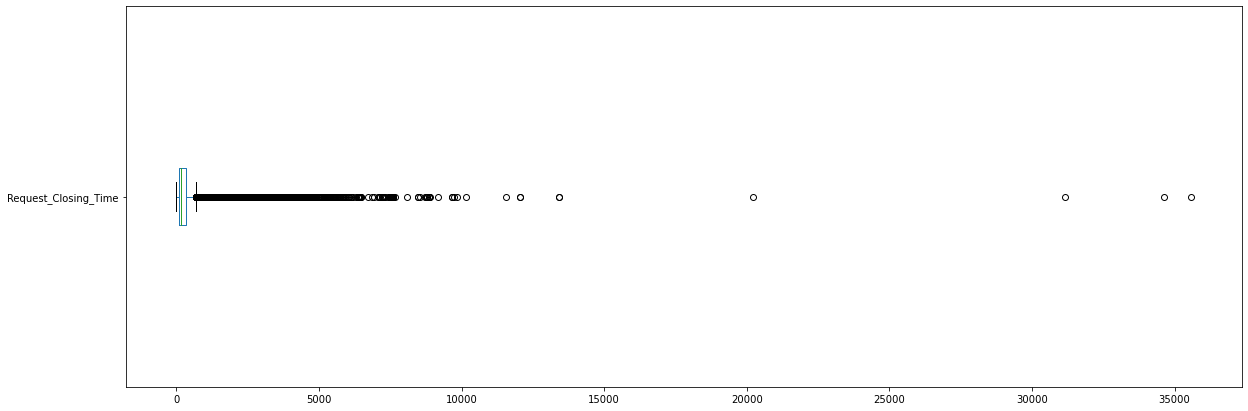

In [31]:
#There are some outliers that means some of the requests taken longer time than the avg resolution time
closed_status_requests.Request_Closing_Time.plot(kind='box', vert=False)

#### *Task 4 - Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [32]:
order_data= closed_status_requests.groupby(['City','Complaint Type']).Request_Closing_Time.mean()
df = order_data.to_frame()
df = df.sort_values(by=['City','Request_Closing_Time'],ascending=False)
df.shape

(747, 1)

In [33]:
#Storing the sorted results
#df.to_csv('sorted_data.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

                                               Request_Closing_Time
City                Complaint Type                                 
WOODSIDE            BIKE/ROLLER/SKATE CHRONIC            728.500000
                    DERELICT VEHICLE                     560.562249
                    GRAFFITI                             539.333333
                    ANIMAL ABUSE                         506.101449
                    VENDING                              437.800000
                    ILLEGAL PARKING                      422.168517
                    NOISE - PARK                         404.710526
                    HOMELESS ENCAMPMENT                  402.696970
                    NOISE - COMMERCIAL                   398.445498
                    NOISE - STREET/SIDEWALK              393.329412
                    BLOCKED DRIVEWAY                     388.239063
                    URINATING IN PUBLIC                  385.125000
                    NOISE - VEHICLE             

#### Task 5 - Perform a statistical test for the following:

In [34]:
#Please note: For the below statements you need to state the Null and Alternate and then provide
#a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
# a. Whether the average response time across complaint types is similar or
# b. Are the type of complaint or service requested and location related?

In [35]:
#a. Whether the average response time across complaint types is similar or not (overall)
#Here complaint type is categorical data and response time is numerical data. Hence, null hypothesis should be calculated using f_onway or anova
closed_status_requests.Request_Closing_Time.groupby(closed_status_requests['Complaint Type']).mean()
#Mean of response time based on Complaint type 

Complaint Type
AGENCY ISSUES                  315.333333
ANIMAL ABUSE                   312.512490
ANIMAL IN A PARK             20210.000000
BIKE/ROLLER/SKATE CHRONIC      225.693396
BLOCKED DRIVEWAY               284.142643
DERELICT VEHICLE               441.499119
DISORDERLY YOUTH               213.167832
DRINKING                       231.391373
GRAFFITI                       428.752212
HOMELESS ENCAMPMENT            261.000907
ILLEGAL FIREWORKS              165.470238
ILLEGAL PARKING                269.724982
NOISE - COMMERCIAL             188.524159
NOISE - HOUSE OF WORSHIP       191.287406
NOISE - PARK                   204.239741
NOISE - STREET/SIDEWALK        206.425917
NOISE - VEHICLE                215.039220
PANHANDLING                    262.072131
POSTING ADVERTISEMENT          118.262751
SQUEEGEE                       242.500000
TRAFFIC                        206.695526
URINATING IN PUBLIC            217.302365
VENDING                        240.542578
Name: Request_Closi

In [36]:
# import anova
from scipy.stats import f_oneway

In [37]:
#Programatically adding compaint types Request closing time params for f_oneway function
result = closed_status_requests.groupby('Complaint Type')['Request_Closing_Time'].apply(list)
f_oneway(*result)

F_onewayResult(statistic=513.9606866025152, pvalue=0.0)

In [38]:
#Response Summary: ● Whether the average response time across complaint types is similar or not (overall)
# f_oneway(for each complaint type request closing time avg)
# Response F_onewayResult(statistic=513.9606866025152, pvalue=0.0)
#Since pvalue = 0.0 is less than 0.05, Reject Null
# Null - No Significant difference in average request closing time by complaint type
# Al - Significant difference in average request closing time by complaint type
#Finally:Reject_null There is relationship between avg response time for each complaint type. Response times will change for based on complaint typ

In [39]:
#5.b. Are the type of complaint or service requested and location related?
#Both complaint type and locations are categorical data. Hence p score should be caluclated using chi2_contingency
#Import chi2_contigency module
from scipy.stats import chi2_contingency

In [40]:
chi2_contingency(pd.crosstab(closed_status_requests['Complaint Type'], closed_status_requests['City']))

(119069.84639856996,
 0.0,
 1034,
 array([[4.42254021e-03, 1.41641902e-01, 2.45048933e-02, ...,
         2.20724962e-02, 4.94922455e-02, 7.36352946e-02],
        [5.72424122e+00, 1.83331835e+02, 3.17175002e+01, ...,
         2.85691675e+01, 6.40594631e+01, 9.53086162e+01],
        [7.37090036e-04, 2.36069836e-02, 4.08414888e-03, ...,
         3.67874936e-03, 8.24870758e-03, 1.22725491e-02],
        ...,
        [3.31174553e+00, 1.06066177e+02, 1.83500809e+01, ...,
         1.65286209e+01, 3.70614432e+01, 5.51405631e+01],
        [4.36357301e-01, 1.39753343e+01, 2.41781614e+00, ...,
         2.17781962e+00, 4.88323489e+00, 7.26534906e+00],
        [2.79578250e+00, 8.95412888e+01, 1.54911767e+01, ...,
         1.39534963e+01, 3.12873478e+01, 4.65497787e+01]]))

In [41]:
#Response summary: Are the type of complaint or service requested and location related?
#Response Summary: chi2_contigency(cross tabe between complaint type and city)
#Response : (119069.84639856996, (ch2 stat),
# 0.0 (pvalue),
# 1034,
#Since pvalue = 0.0 is less than 0.05, Reject Null
# Null - No Significant difference in city and complaint type
# Al - Significant difference in city and complaint type
#Finally: Reject null, means There is relationship between complaint type location of issue reported

#### Thank You